In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered_220.csv')
test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [ ]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)

In [ ]:
gbc = [0.0307,0.0371,0.0566,0.0645,0.0664,0.1080,0.1488,0.1386,0.0282,0.0265,0.0680]
ada = [0.0032,0.0071,0.0059,0.0066,0.0467,0.0755,0.0380,0.0379,0.0503,0.0280,0.0392]
rfc = [0.0172,0.0547,0.0713,0.0493,0.0386,0.1409,0.0860,0.1770,0.0336,0.0350,0.0415]
nb = [0.0047,0.0083,-0.0284,-0.0253,0.0527,-0.0091,0.0170,0.0445,-0.0480,-0.0569,-0.0295]
nnmlp = [0.1232,0.1243,0.1451,0.1369,0.1180,0.2006,0.2486,0.2399,0.0653,0.1306,0.1545] 
svc = [0.1278,0.1328,0.1584,0.1394,0.0727,0.1538,0.1740,0.1820,0.0753,0.1278,0.1149]
cnn = [0.0008,0.0038,0.0142,0.0070,0.0102,0.0496,0.0776,0.0570,0.0020,0.0330,-0.0012]
lstm = [0.0240,0.0046,-0.0028,0.0240,0.0190,0.0112,0.0468,0.1254,0.0878,0.0284,0.0172]

In [ ]:
from sklearn.preprocessing import normalize
import seaborn as sns
sns.set()

gbc = np.repeat(gbc,20)
ada = np.repeat(ada,20)
rfc = np.repeat(rfc,20)
nb = np.repeat(nb,20)
nnmlp = np.repeat(nnmlp,20)
svc = np.repeat(svc,20)
cnn = np.repeat(cnn,20)
lstm = np.repeat(lstm,20)

n5= normalize(X_test)

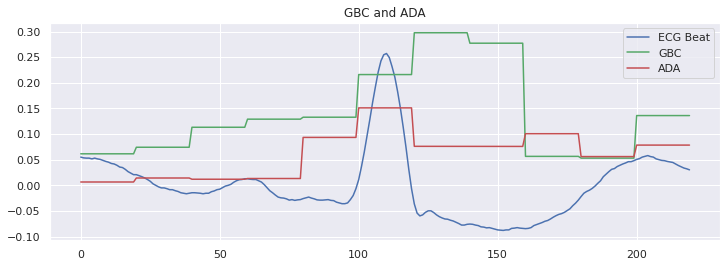

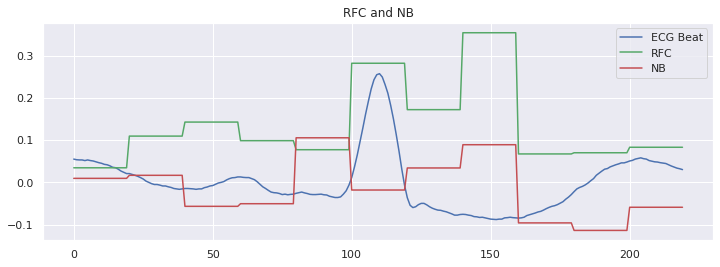

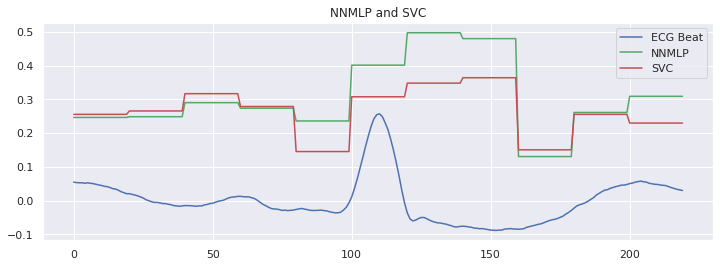

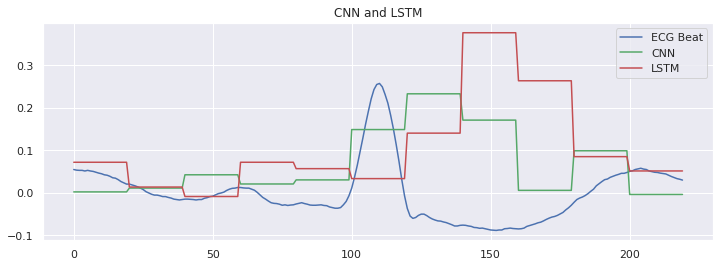

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(gbc*2,color='g',label='GBC')
plt.plot(ada*2,color='r',label='ADA')
plt.title('GBC and ADA')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(rfc*2,color='g',label='RFC')
plt.plot(nb*2,color='r',label='NB')
plt.title('RFC and NB')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(nnmlp*2,color='g',label='NNMLP')
plt.plot(svc*2,color='r',label='SVC')
plt.title('NNMLP and SVC')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(cnn*3,color='g',label='CNN')
plt.plot(lstm*3,color='r',label='LSTM')
plt.title('CNN and LSTM')
plt.legend()
plt.show()

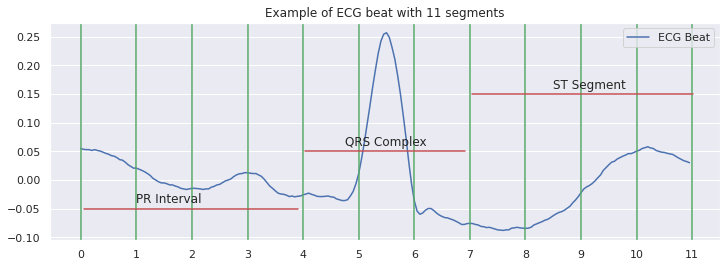

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')

xcoords = [0,20,40,60,80,100,120,140,160,180,200,220]
for xc in zip(xcoords):
    plt.axvline(x=xc, c='g')


plt.axhline(y=-0.05,xmin=0.05,xmax=0.37,color='r')
plt.axhline(y=0.05,xmin=0.38,xmax=0.62,color='r')
plt.axhline(y=0.15,xmin=0.63,xmax=0.96,color='r')

plt.text(x=20,y=-0.04,s='PR Interval')
plt.text(x=95,y=0.06,s='QRS Complex')
plt.text(x=170,y=0.16,s='ST Segment')


plt.legend()
plt.xticks(ticks=xcoords,labels=(0,1,2,3,4,5,6,7,8,9,10,11))
plt.title('Example of ECG beat with 11 segments')
plt.show()

In [ ]:
gbc_corr = [0.0594,0.0592,0.0861,0.1022,0.1141,0.1526,0.2015,0.2017,0.0639,0.0536,0.1056]
gbc_mis = [-0.1317,-0.1042,-0.1248,-0.1418,-0.1915,-0.1476,-0.1466,-0.2138,-0.1728,-0.1221,-0.1654]

ada_corr = [0.0229,0.0291,0.0226,0.1714,0.2583,0.3399,0.1653,0.2587,0.1962,0.2504,0.2154]
ada_mis= [-0.0200,-0.0234,-0.0133,-0.0813,-0.0748,-0.0793,-0.0238,-0.0663,-0.0348,-0.0821,-0.0748]

rfc_corr = [0.0354,0.0771,0.1119,0.0753,0.0764,0.1931,0.1199,0.2302,0.0700,0.0661,0.0705]
rfc_mis = [-0.0926,-0.1068,-0.1943,-0.1130,-0.1928,-0.2019,-0.1216,-0.1670,-0.2212,-0.1566,-0.1362]

nb_corr = [0.0754,0.0999,0.0550,0.1077,0.2315,0.1894,0.1513,0.3238,0.1383,0.0689,0.0972]
nb_mis = [-0.0316,-0.0413,-0.0800,-0.0887,-0.0449,-0.1096,-0.0589,-0.0803,-0.1239,-0.1260,-0.0931]

nnmlp_corr = [0.1609,0.1641,0.1882,0.1834,0.1580,0.2472,0.3011,0.2926,0.1109,0.1809,0.2077] 
nnmlp_mis = [-0.2164,-0.2167,-0.2048,-0.2264,-0.2283,-0.1721,-0.1783,-0.2067,-0.3012,-0.2519,-0.2633] 

svc_corr = [0.1699,0.1724,0.2074,0.1854,0.1039,0.1966,0.2137,0.2251,0.1161,0.1667,0.1606]
svc_mis = [-0.2402,-0.2087,-0.2018,-0.1986,-0.1997,-0.1763,-0.1265,-0.1885,-0.2271,-0.1923,-0.2209]

In [ ]:
gbc_corr = np.repeat(gbc_corr,20)
gbc_mis = np.repeat(gbc_mis,20)

ada_corr = np.repeat(ada_corr,20)
ada_mis = np.repeat(ada_mis,20)

rfc_corr = np.repeat(rfc_corr,20)
rfc_mis = np.repeat(rfc_mis,20)

nb_corr = np.repeat(nb_corr,20)
nb_mis = np.repeat(nb_mis,20)

nnmlp_corr = np.repeat(nnmlp_corr,20)
nnmlp_mis = np.repeat(nnmlp_mis,20)

svc_corr = np.repeat(svc_corr,20)
svc_mis = np.repeat(svc_mis,20)

n5= normalize(X_test)

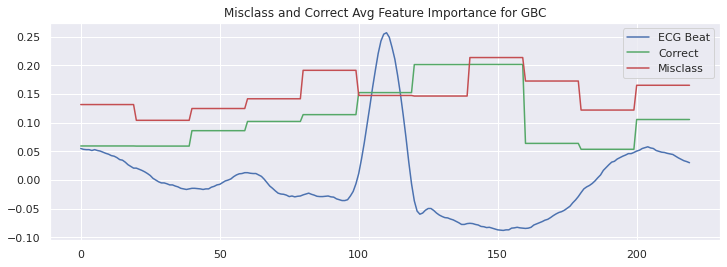

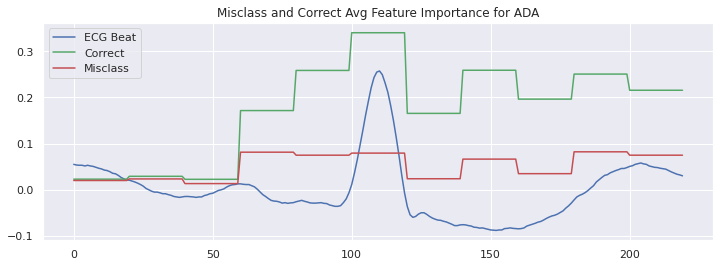

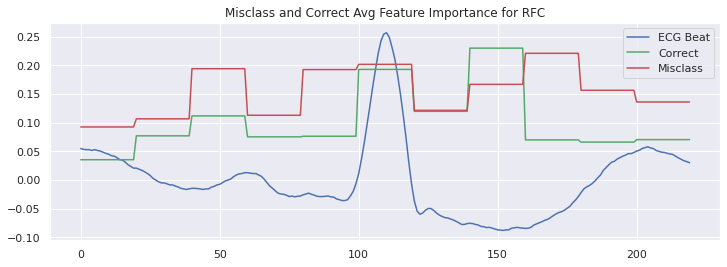

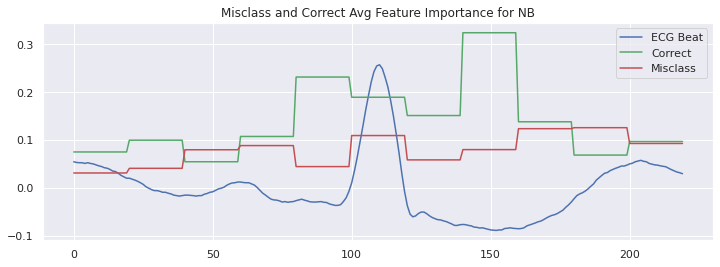

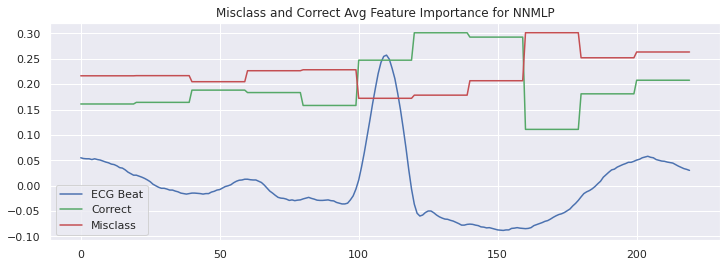

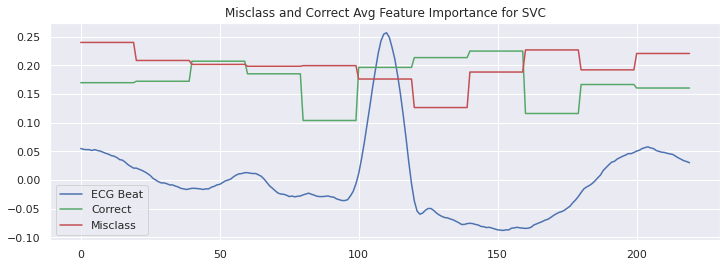

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(gbc_corr,color='g',label='Correct')
plt.plot(np.abs(gbc_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for GBC')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(ada_corr,color='g',label='Correct')
plt.plot(np.abs(ada_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for ADA')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(rfc_corr,color='g',label='Correct')
plt.plot(np.abs(rfc_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for RFC')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(nb_corr,color='g',label='Correct')
plt.plot(np.abs(nb_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for NB')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(nnmlp_corr,color='g',label='Correct')
plt.plot(np.abs(nnmlp_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for NNMLP')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(svc_corr,color='g',label='Correct')
plt.plot(np.abs(svc_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for SVC')
plt.legend()
plt.show()